1. Biểu diễn dữ liệu

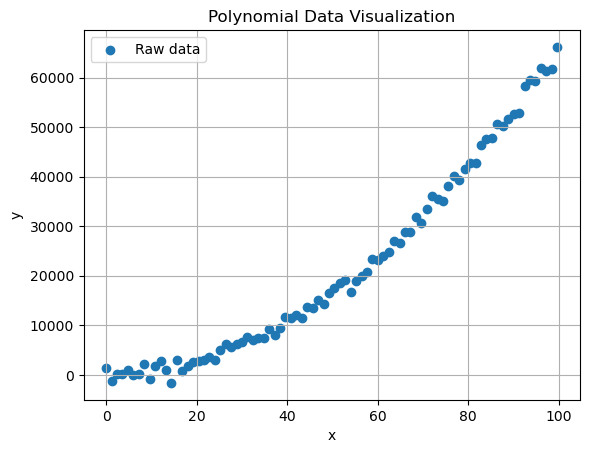

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

poly_df = pd.read_csv("data3.csv")
x = poly_df['x'].values
y = poly_df['y'].values

plt.figure()
plt.scatter(x, y, label="Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Data Visualization")
plt.legend()
plt.grid(True)
plt.show()

2. Chọn mô hình "h" phù hợp (bậc bao nhiêu?)

In [8]:
degree = 3

3. Chuyển bài toán đa bậc thành bài toán đa biến và chuẩn hóa dữ liệu: scale dữ liệu, format kích thước dữ liệu

In [9]:
X_poly = np.vstack([x**i for i in range(1, degree + 1)])  # (degree, m)
mu = np.mean(X_poly, axis=1, keepdims=True)
sigma = np.std(X_poly, axis=1, keepdims=True)
X_poly_norm = (X_poly - mu) / sigma
X_b = np.vstack([np.ones((1, X_poly.shape[1])), X_poly_norm])  # (degree+1, m)
y = y[None, :]  # (1, m)
m = X_poly.shape[1]

4. Viết chương trình cho phép học các tham số của mô hình hồi quy tuyến tính đa biến

In [10]:
def compute_cost(X, y, theta):
    h = theta.T @ X
    loss = h - y
    return (1 / (2 * m)) * np.sum(loss ** 2)

alpha = 0.01
num_iters = 400
theta = np.zeros((X_b.shape[0], 1))
J_history = []

for _ in range(num_iters):
    h = theta.T @ X_b
    loss = h - y
    gradient = (1 / m) * (X_b @ loss.T)
    theta -= alpha * gradient
    J_history.append(compute_cost(X_b, y, theta))


5. Tính J ở mỗi vòng lặp, và vẽ biểu đồ J ở các giá trị learning rate khác nhau sau khi chạy hết các vòng lặp.

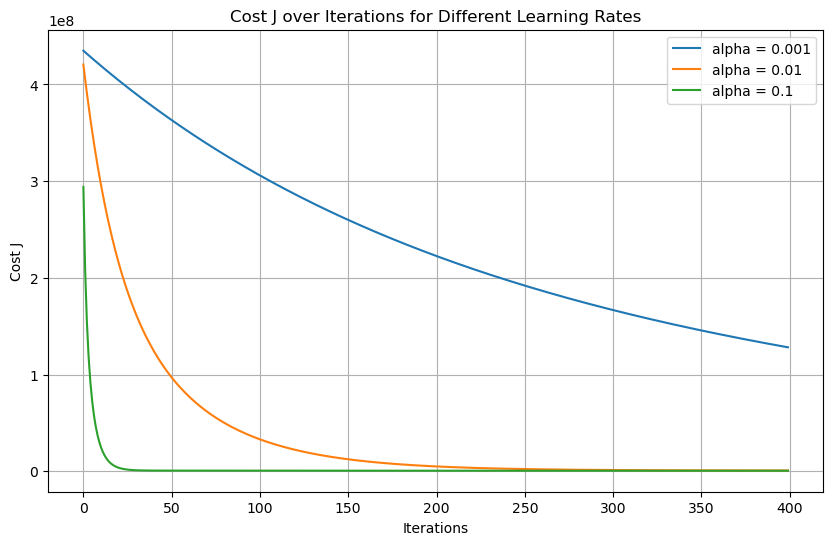

In [11]:
alphas = [0.001, 0.01, 0.1]
J_histories = {}

for alpha in alphas:
    theta_temp = np.zeros((X_b.shape[0], 1))
    J_temp = []
    for _ in range(num_iters):
        h = theta_temp.T @ X_b
        loss = h - y
        gradient = (1 / m) * (X_b @ loss.T)
        theta_temp -= alpha * gradient
        J_temp.append(compute_cost(X_b, y, theta_temp))
    J_histories[alpha] = J_temp

plt.figure(figsize=(10, 6))
for alpha, J_hist in J_histories.items():
    plt.plot(range(num_iters), J_hist, label=f"alpha = {alpha}")
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost J over Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

6. Biển diễn đường cong học được và dữ liệu trên cùng 1 hình ảnh.

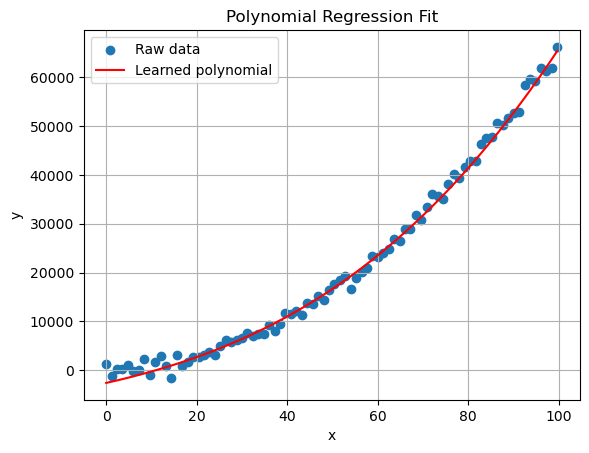

In [12]:
x_plot = np.linspace(np.min(x), np.max(x), 100)
X_plot_poly = np.vstack([x_plot**i for i in range(1, degree + 1)])
X_plot_poly_norm = (X_plot_poly - mu) / sigma
X_plot_b = np.vstack([np.ones((1, x_plot.shape[0])), X_plot_poly_norm])
y_plot = (theta.T @ X_plot_b).flatten()

plt.figure()
plt.scatter(x, y.flatten(), label="Raw data")
plt.plot(x_plot, y_plot, color='red', label="Learned polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()